In [1]:
pwd

'C:\\Users\\USER'

# Data Proccessing and Cleaning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
train_path = "~\Documents\FILES\Books\Science\Data Science\Datasets\Tunisia Fight delay\Train.csv"
test_path = "~\Documents\FILES\Books\Science\Data Science\Datasets\Tunisia Fight delay\Test.csv"

In [43]:
train = pd.read_csv(train_path, index_col = 'ID')
test = pd.read_csv(test_path)

In [5]:
train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [6]:
test.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [7]:
train['DATOP'] = pd.to_datetime(train.DATOP, format='%Y-%m-%d')
train['STD'] = pd.to_datetime(train.STD, format='%Y-%m-%d %H:%M:%S')
train['STA'] = pd.to_datetime(train.STA, format='%Y-%m-%d %H.%M.%S')
test['DATOP'] = pd.to_datetime(test.DATOP, format='%Y-%m-%d')
test['STD'] = pd.to_datetime(test.STD, format='%Y-%m-%d %H:%M:%S')
test['STA'] = pd.to_datetime(test.STA, format='%Y-%m-%d %H.%M.%S')

In [8]:
test_original = test.copy()
train_original = train.copy()

In [9]:
train['DATOP'].nunique()

1011

In [10]:
train.shape

(107833, 9)

In [11]:
#creating a base model
train.mean()

target    48.733013
dtype: float64

In [12]:
train['FLTID'] = train['FLTID'].astype(str).str[:-1]
test['FLTID'] = test['FLTID'].astype(str).str[:-1]

In [13]:
train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0


In [14]:
test.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF
test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW
test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC
test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO
test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ


In [15]:
train['STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [16]:
train.isnull().sum(axis=0)

DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [17]:
#encoding the delay time of each aircraft code
train.target.max()

3451.0

# Feature Engineering

In [18]:
train['YEAR'] = pd.DatetimeIndex(train['DATOP']).year
test['YEAR'] = pd.DatetimeIndex(test['DATOP']).year

In [19]:
#encoding hypothesis
train['trajectory'] = train['DEPSTN'] + '-' + train['ARRSTN']
test['trajectory'] = test['DEPSTN'] + '-' + test['ARRSTN']

In [20]:
train['MONTH'] = pd.DatetimeIndex(train['DATOP']).month
train['DAY'] = pd.DatetimeIndex(train['DATOP']).day
train['DAY_OF_WEEK'] = pd.DatetimeIndex(train['DATOP']).dayofweek
train['WEEK_OF_YEAR'] = pd.DatetimeIndex(train['DATOP']).week
test['MONTH'] = pd.DatetimeIndex(test['DATOP']).month
test['DAY'] = pd.DatetimeIndex(test['DATOP']).day
test['DAY_OF_WEEK'] = pd.DatetimeIndex(test['DATOP']).dayofweek
test['WEEK_OF_YEAR'] = pd.DatetimeIndex(test['DATOP']).week


In [21]:
train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,YEAR,trajectory,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR
ID,,,,,,,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,CMN-TUN,1,3,6,53
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,MXP-TUN,1,13,2,2
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,TUN-IST,1,16,5,2
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,DJE-NTE,1,17,6,2
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,TUN-ALG,1,17,6,2


In [22]:
TFD = [train, test]
for Z in TFD:
    # FIRST THREE MONTH DENOTED AS WINTER
    Z.loc[(Z['MONTH']<3)|(Z['MONTH'] == 12), 'SEASON'] =0
    #
    Z.loc[(Z['MONTH']>=3)&(Z['MONTH'] < 6), 'SEASON'] =1
    Z.loc[(Z['MONTH']>=6)&(Z['MONTH'] < 9), 'SEASON'] =2
    Z.loc[(Z['MONTH']>=9)&(Z['MONTH'] < 12), 'SEASON'] =3
    Z['SEASON'] = Z['SEASON'].astype(int)

In [23]:
train['DEP_MINUTE'] = pd.DatetimeIndex(train['STD']).minute
test['DEP_MINUTE'] = pd.DatetimeIndex(test['STD']).minute
train['ARR_MINUTE'] = pd.DatetimeIndex(train['STA']).minute
test['ARR_MINUTE'] = pd.DatetimeIndex(test['STA']).minute

In [24]:
train['DEP_HOUR'] = pd.DatetimeIndex(train['STD']).hour
train['ARR_HOUR'] = pd.DatetimeIndex(train['STA']).hour
test['DEP_HOUR'] = pd.DatetimeIndex(test['STD']).hour
test['ARR_HOUR'] = pd.DatetimeIndex(test['STA']).hour
TFD  = [train,test]
for F in TFD:
    F.loc[(F['DEP_HOUR']<12), 'DEP_HOUR_AM_PM'] = 0
    F.loc[(F['DEP_HOUR']>=12), 'DEP_HOUR_AM_PM'] = 1
    F['DEP_HOUR_AM_PM'] = F['DEP_HOUR_AM_PM'].astype(int)
    F.loc[(F['ARR_HOUR']<12), 'ARR_HOUR_AM_PM'] = 0
    F.loc[(F['ARR_HOUR']>=12), 'ARR_HOUR_AM_PM'] = 1
    F['ARR_HOUR_AM_PM'] = F['ARR_HOUR_AM_PM'].astype(int)

In [25]:
train['FLTD_HOUR'] = train['ARR_HOUR'] - train['DEP_HOUR'] 
test['FLTD_HOUR'] = test['ARR_HOUR'] - test['DEP_HOUR'] 


In [26]:
train['FLTD_MINUTE'] = ((train['ARR_HOUR']*60) +train['ARR_MINUTE'] ) - ((train['DEP_HOUR']*60 )+train['DEP_MINUTE'])
test['FLTD_MINUTE'] = ((test['ARR_HOUR']*60) +test['ARR_MINUTE'] ) - ((test['DEP_HOUR']*60 )+test['DEP_MINUTE'])


In [27]:
train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,YEAR,...,WEEK_OF_YEAR,SEASON,DEP_MINUTE,ARR_MINUTE,DEP_HOUR,ARR_HOUR,DEP_HOUR_AM_PM,ARR_HOUR_AM_PM,FLTD_HOUR,FLTD_MINUTE
ID,,,,,,,,,,,,,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,...,53,0,30,55,10,12,0,1,2,145
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,...,2,0,5,55,15,16,1,1,1,110
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,...,2,0,10,45,4,6,0,0,2,155
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,...,2,0,10,0,14,17,1,1,3,170
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,...,2,0,30,50,14,15,1,1,1,80


In [28]:
test.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,YEAR,trajectory,...,WEEK_OF_YEAR,SEASON,DEP_MINUTE,ARR_MINUTE,DEP_HOUR,ARR_HOUR,DEP_HOUR_AM_PM,ARR_HOUR_AM_PM,FLTD_HOUR,FLTD_MINUTE
ID,,,,,,,,,,,,,,,,,,,,,
test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,DJE-TUN,...,18,1,40,30,6,7,0,0,1,50
test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,TUN-BKO,...,18,1,20,5,15,20,1,1,5,285
test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,FRA-TUN,...,18,1,0,25,10,12,0,1,2,145
test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,BEY-TUN,...,19,1,40,10,9,13,0,1,4,210
test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,ORY-MIR,...,19,1,50,35,9,12,0,1,3,165


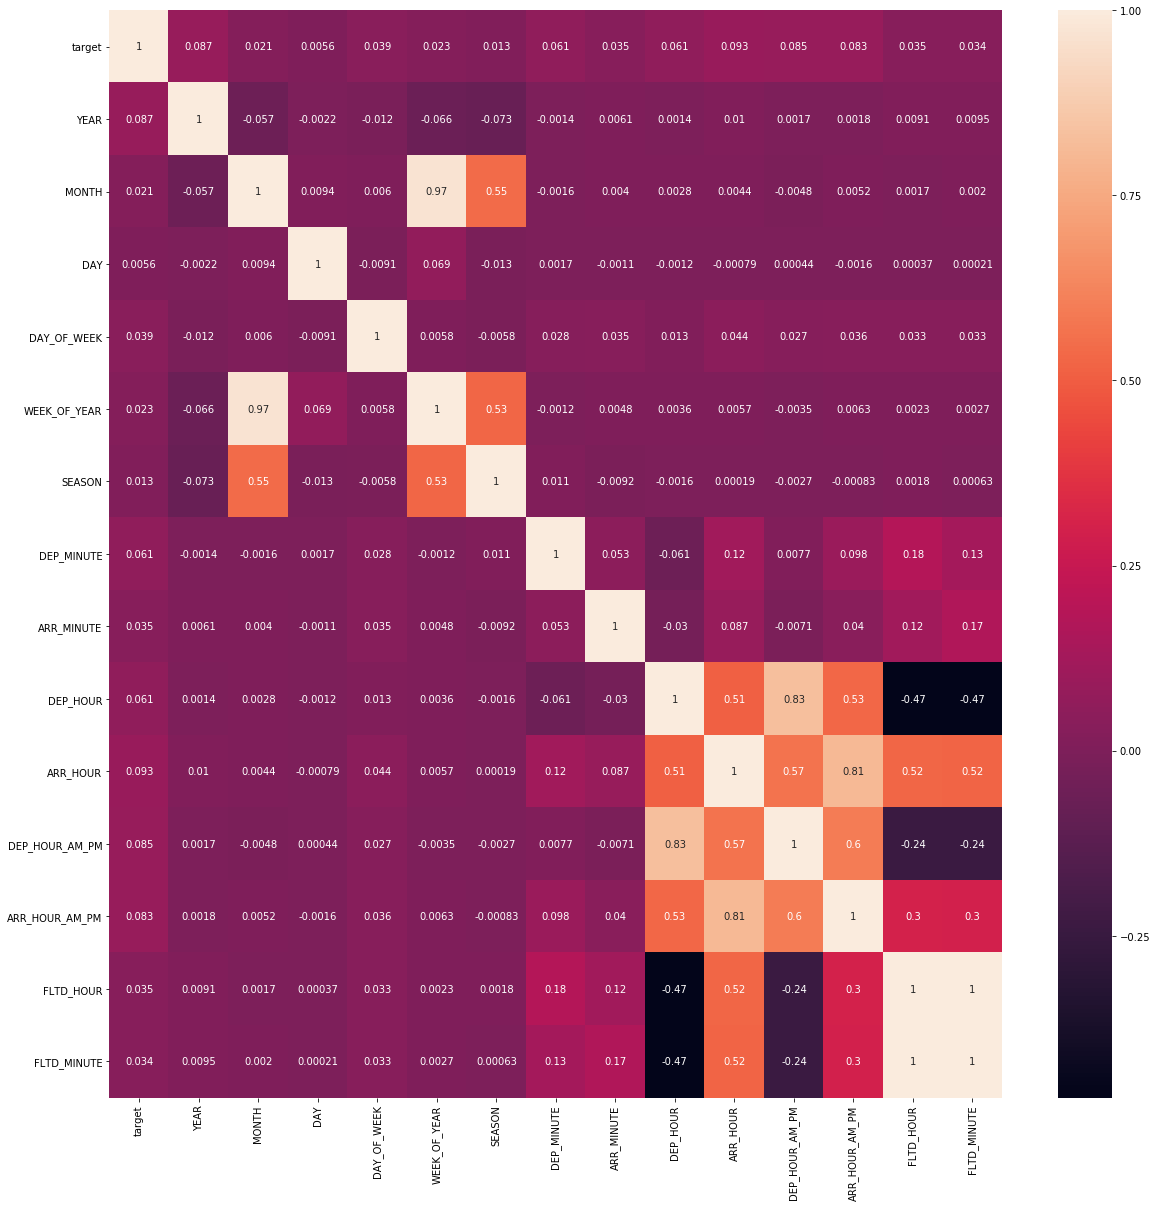

In [29]:
plt.figure(figsize=(20,20))
Y = train.corr('pearson')
D= sns.heatmap(Y, annot=True)

In [30]:
# APPLYING CATEGORICAL ENCODING TO THE 
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 24 columns):
DATOP             107833 non-null datetime64[ns]
FLTID             107833 non-null object
DEPSTN            107833 non-null object
ARRSTN            107833 non-null object
STD               107833 non-null datetime64[ns]
STA               107833 non-null datetime64[ns]
STATUS            107833 non-null object
AC                107833 non-null object
target            107833 non-null float64
YEAR              107833 non-null int64
trajectory        107833 non-null object
MONTH             107833 non-null int64
DAY               107833 non-null int64
DAY_OF_WEEK       107833 non-null int64
WEEK_OF_YEAR      107833 non-null int64
SEASON            107833 non-null int32
DEP_MINUTE        107833 non-null int64
ARR_MINUTE        107833 non-null int64
DEP_HOUR          107833 non-null int64
ARR_HOUR          107833 non-null int64
DEP_HOUR_AM_PM    107833 non-null int32
A

In [31]:
Train = train[['DEPSTN','AC','STATUS','ARRSTN','FLTID','YEAR','MONTH','DAY','DAY_OF_WEEK','WEEK_OF_YEAR','SEASON','DEP_MINUTE',
               'DEP_HOUR','ARR_MINUTE','ARR_HOUR','DEP_HOUR_AM_PM','ARR_HOUR_AM_PM','FLTD_HOUR','FLTD_MINUTE','trajectory']]
Test = test[['DEPSTN','AC','STATUS','ARRSTN','FLTID','YEAR','MONTH','DAY','DAY_OF_WEEK','WEEK_OF_YEAR','SEASON','DEP_MINUTE',
             'DEP_HOUR','ARR_MINUTE','ARR_HOUR','DEP_HOUR_AM_PM','ARR_HOUR_AM_PM','FLTD_HOUR','FLTD_MINUTE','trajectory']]

In [32]:
Train.head()

,DEPSTN,AC,STATUS,ARRSTN,FLTID,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR,SEASON,DEP_MINUTE,DEP_HOUR,ARR_MINUTE,ARR_HOUR,DEP_HOUR_AM_PM,ARR_HOUR_AM_PM,FLTD_HOUR,FLTD_MINUTE,trajectory
ID,,,,,,,,,,,,,,,,,,,,
train_id_0,CMN,TU 32AIMN,ATA,TUN,TU 0712,2016,1,3,6,53,0,30,10,55,12,0,1,2,145,CMN-TUN
train_id_1,MXP,TU 31BIMO,ATA,TUN,TU 0757,2016,1,13,2,2,0,5,15,55,16,1,1,1,110,MXP-TUN
train_id_2,TUN,TU 32AIMN,ATA,IST,TU 0214,2016,1,16,5,2,0,10,4,45,6,0,0,2,155,TUN-IST
train_id_3,DJE,TU 736IOK,ATA,NTE,TU 0480,2016,1,17,6,2,0,10,14,0,17,1,1,3,170,DJE-NTE
train_id_4,TUN,TU 320IMU,ATA,ALG,TU 0338,2016,1,17,6,2,0,30,14,50,15,1,1,1,80,TUN-ALG


In [33]:
Test.head()

,DEPSTN,AC,STATUS,ARRSTN,FLTID,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR,SEASON,DEP_MINUTE,DEP_HOUR,ARR_MINUTE,ARR_HOUR,DEP_HOUR_AM_PM,ARR_HOUR_AM_PM,FLTD_HOUR,FLTD_MINUTE,trajectory
ID,,,,,,,,,,,,,,,,,,,,
test_id_0,DJE,TU 32AIMF,ATA,TUN,TU 0700,2016,5,4,2,18,1,40,6,30,7,0,0,1,50,DJE-TUN
test_id_1,TUN,TU 320IMW,ATA,BKO,TU 0395,2016,5,5,3,18,1,20,15,5,20,1,1,5,285,TUN-BKO
test_id_2,FRA,TU 32AIMC,ATA,TUN,TU 0745,2016,5,6,4,18,1,0,10,25,12,0,1,2,145,FRA-TUN
test_id_3,BEY,TU 31BIMO,ATA,TUN,TU 0848,2016,5,11,2,19,1,40,9,10,13,0,1,4,210,BEY-TUN
test_id_4,ORY,TU 736IOQ,ATA,MIR,TU 0635,2016,5,11,2,19,1,50,9,35,12,0,1,3,165,ORY-MIR


# Data Splitting and Model Evaluation

In [34]:
X = Train
y = train.target

In [35]:
X.head()

,DEPSTN,AC,STATUS,ARRSTN,FLTID,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR,SEASON,DEP_MINUTE,DEP_HOUR,ARR_MINUTE,ARR_HOUR,DEP_HOUR_AM_PM,ARR_HOUR_AM_PM,FLTD_HOUR,FLTD_MINUTE,trajectory
ID,,,,,,,,,,,,,,,,,,,,
train_id_0,CMN,TU 32AIMN,ATA,TUN,TU 0712,2016,1,3,6,53,0,30,10,55,12,0,1,2,145,CMN-TUN
train_id_1,MXP,TU 31BIMO,ATA,TUN,TU 0757,2016,1,13,2,2,0,5,15,55,16,1,1,1,110,MXP-TUN
train_id_2,TUN,TU 32AIMN,ATA,IST,TU 0214,2016,1,16,5,2,0,10,4,45,6,0,0,2,155,TUN-IST
train_id_3,DJE,TU 736IOK,ATA,NTE,TU 0480,2016,1,17,6,2,0,10,14,0,17,1,1,3,170,DJE-NTE
train_id_4,TUN,TU 320IMU,ATA,ALG,TU 0338,2016,1,17,6,2,0,30,14,50,15,1,1,1,80,TUN-ALG


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.7, random_state=20)

In [37]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, train.shape

((75483, 20), (32350, 20), (75483,), (32350,), (107833, 24))

In [38]:
categorical_col = [cname for cname in Train.columns if Train[cname].dtypes == 'object' ]
categorical_col

['DEPSTN', 'AC', 'STATUS', 'ARRSTN', 'FLTID', 'trajectory']

In [39]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=700,depth= 10, l2_leaf_reg= 7, learning_rate= 0.1) 
#depth= 10, l2_leaf_reg= 7, learning_rate= 0.1
model.fit(X_train,y_train,verbose=False,cat_features=categorical_col)
pred = model.predict(X_valid)

In [40]:
from sklearn.metrics import mean_squared_error
rmsepred = np.sqrt(mean_squared_error(pred, y_valid))
rmsepred

110.78881191408722

In [41]:
test_pred = model.predict(Test)

In [44]:
submission= pd.DataFrame({'ID':test["ID"],'target':test_pred})
submission.to_csv("submission.csv",index=False)